In [257]:
import random
import matplotlib.pyplot as plt

In [63]:
move = ['L','R']
dictr  = { 1:'a' , 2 : 'b' , 3 : 'c' , 4 : 'd' , 5 : 'e' }
def Episodes() :
  pos = 3 
  states = ['c']
  while( pos>0 and pos<6 ) :
    dir = random.choice(move) 
    if dir=='L' :
      pos = pos - 1
    else :
      pos =  pos + 1
    if (pos>0 and pos<6) :
      states.append( dictr[pos] )
  reward = None
  if pos==6 :
    reward = 1 
  else :
    reward = 0
  return [states,reward]

In [288]:
def MC(episodes,alpha) :
  rmse=[]
  sum=0.0
  IsVisited = { 'a':'F' , 'b' :'F' , 'c' :'F' , 'd':'F' , 'e':'F'  }
  state_value = {'a':0,'b':0,'c':0,'d':3,'e':0} 
  for i in range(episodes) :
     [states,r] = Episodes() 
     for state in states :
       if IsVisited[state] == 'F' :
          state_value[ state ] =  state_value[state] + alpha*( r - state_value[state] )
          IsVisited[state] = 'T'
     index = 1.0 
     for state in ['a','b','c','d','e'] :
       IsVisited[state] = 'F'
       sum = sum + ( index/6.0 - state_value[state] )**2 
       index =index + 1.0
     rmse.append( sum/6 ) 
     sum=0
  return [state_value,rmse]


In [301]:
 total_episodes = 100
 alphal = [0.01,0.02,0.03,0.04]
 sv=[]
 rm=[]
 iters=[]
 for i in range(1,total_episodes+1) :
   iters.append(i)
 for alpha in alphal :
    [state_values,loss]=MC(total_episodes,alpha)
    sv.append(state_values)
    rm.append(loss)

RMSE

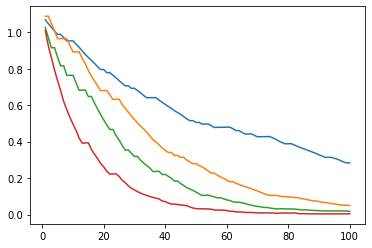

In [302]:
plt.plot(iters,rm[0])
plt.plot(iters,rm[1])
plt.plot(iters,rm[2])
plt.plot(iters,rm[3])

State Value

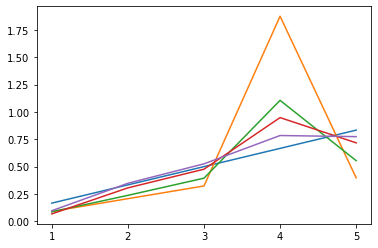

In [310]:
x = ['1','2','3','4','5']
y = [1.0/6,2.0/6,3.0/6,4.0/6,5.0/6]
plt.plot(x,y)
plt.plot(x,list(sv[0].values()))
plt.plot(x,list(sv[1].values()))
plt.plot(x,list(sv[2].values()))
plt.plot(x,list(sv[3].values()))

In [333]:
def TD(alpha,discount,episodes=10) :
  random.seed(10)
  rm=[]
  IsVisited = {'a':'F','b':'F','c':'F','d':'E','e':'F'}
  state_value = {'a':0,'b':0,'c':0,'d':0,'e':0} 
  for j in range(episodes) :
      [states,r] = Episodes() 
      for i in range(len(states)-1) :
         state_value[states[i] ] = state_value[states[i] ] + alpha*(0.0 + (discount**(i+1))*state_value[ states[i+1] ] - state_values[ states[i] ] )
      state_value[ states[-1] ] = state_value[ states[-1] ] +  alpha*((r*discount**( len(states)-1 ) - 0 - state_value[ states[-1] ]) ) 
      sum=0
      index= 1
      for state in ['a','b','c','d','e'] :
        sum = sum + (index/6.0 - state_value[state] )**2 
        index = index + 1    
      rm.append( sum/6.0 )
  return [state_value,rm]

In [334]:
alphal1 = [0.5,1.0,1.5]
episodes = 100
discount = 0.00001
sv=[]
rm=[]
for alpha in alphal1 :
  [state_value,loss] = TD(alpha,discount,episodes) 
  sv.append(state_value)
  rm.append(loss)



RMSe

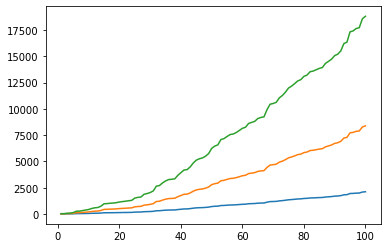

In [335]:
plt.plot(iters,rm[0])
plt.plot(iters,rm[1])
plt.plot(iters,rm[2])


State Value

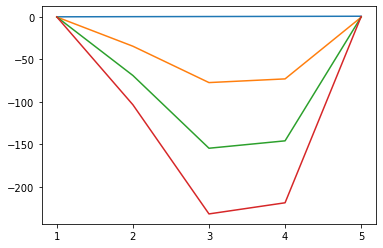

In [336]:
x = ['1','2','3','4','5']
y = [1.0/6,2.0/6,3.0/6,4.0/6,5.0/6]
plt.plot(x,y)
plt.plot(x,list(sv[0].values()))
plt.plot(x,list(sv[1].values()))
plt.plot(x,list(sv[2].values()))
